## Equipo 30
### A01793999 - Nathalia Prada
### A01793933 - Christian Suárez Gil

# Semana 3 - Actividad 1

## Parte 1: Fundamentos de bases de datos

### 1.	Fundamentos de bases de datos y para ciencia de datos.  
Las bases de datos son el medio a través del cual se almacenan, y se da disponibilidad para su consulta, conjuntos de datos estructurados. Normalmente, cuentan con información relacionada de manera lógica y con una administración central y estandarizada de cada una de sus tablas, para poder conectarlas en un ámbito de negocio. Las bases de datos son de gran importancia para la ciencia de datos, dado que suelen ser la fuente más usada de consulta de información en la mayoría de las organizaciones.

Una base de datos está definida un conjunto estructurado de datos guardados en la memoria del computador o en la nube que es accesible de varias maneras. 

Algunas de las bases de datos más comunes son las bases de datos relacionales, Las bases de datos relacionales se basan en el modelo relacional, una forma intuitiva y directa de representar datos en tablas. En una base de datos relacional, cada fila en una tabla es un registro con una ID única, llamada clave. Las columnas de la tabla contienen los atributos de los datos y cada registro suele tener un valor para cada atributo, lo que simplifica la creación de relaciones entre los puntos de datos.
También existen las bases de datos no relacionales de sus principales características es que no trabajan con estructuras definidas. Es decir, los datos no se almacenan en tablas, y la información tampoco se organiza en registros o campos. Tienen una gran escalabilidad y están pensadas para la gestión de grandes volúmenes de datos. 

ETL vs ELT: tradicionalmente las bases de datos se gestión a través de la extracción transformación y cargue de información, sin embargo, con las nuevas capacidades de cómputo de las bases de datos y la nube grandes cantidades de datos se están cargando para luego transformadas lo que cambia el paradigma tradicional de ETL a ELT (donde el cargue ocurre antes de la transformación).

### 2.	Fundamentos de almacenes de datos (Data Warehouse) para ciencia de datos.
Los Data Warehouse o almacenes de datos son grandes repositorios que consolidan e integran información de las diferentes fuentes y bases de datos de una compañía, con el objetivo particular de facilitar su extracción para procesos de Visualización y Ciencia de datos. Estos se encuentran optimizados para hacer más eficientes los procesos de uso de la información y no solo su almacenamiento. Cobran relevancia para la Ciencia de datos, ya que es el tipo de infraestructura al cuál están migrando las grandes empresas, al notar que las bases de datos tradicionales no son suficientes a medida que crecen los volúmenes y fuentes de información.

El esquema de estrella es común mente usado en los almacenes de datos, en esta técnica de modelamiento dimensional los datos se dividen en dimensiones y hechos.
 Un registro en una tabla de “hechos” (facts) contiene “metadata” de una entidad, así como “medidas” (valores numéricos) que se quieren rastrear y luego resumir. Una dimensión es una propiedad de la entidad por la que puede agrupar o "cortar y seleccionar" los registros de hechos, y una tabla de dimensiones contendrá más información de esa propiedad.
 
Ejemplo:
Un registro transaccional de una tienda es un “hecho” (fact) que contiene los datos característicos de la compra: fecha de compra, numero de orden, cantidad pagada, y número de cliente. Y la tabla de dimensión asociada de la tienda contendría información adicional de la tienda, como su nombre. Con la tabla de dimensión tienda se puede se puede obtener un resumen de compras por tienda, por ejemplo. 

El esquema de estrella es muy usado en la visualización de datos como por ejemplo en Power BI.



## Parte 2: Selección y limpieza de los Datos en Python

### 1. Revisa detenidamente la página Ejercicio guiado para: Selección y limpieza de los Datos en Python

La limpieza de datos implica observar más de cerca los problemas en los datos que ha seleccionado incluir en el análisis.

### Problema de datos 

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

Alternativamente, podemos leer un conjunto de datos ya disponible:

In [2]:
df = pd.read_csv('C:\\Users\\npradah\\Documents\\actividades-de-aprendizaje-nathaliaprada\\Semana 3\\default of credit card clients.csv', index_col=0)
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


Para verificar, ¿falta algún dato?:

In [3]:
df.isnull().values.any()

True

In [4]:
df.isnull().any()

X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

alternativamente:

In [5]:
df.isna().values.any()

True

In [6]:
df.isna().any()

X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

In [7]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


### Solucion 1: 

Descartar las observaciones con valores faltantes

In [8]:
df.dropna(inplace = True)

In [9]:
df.isna().values.any()

False

In [10]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


El problema con esta estrategia es que, 
>> si falta algún dato en todo el conjunto de datos, la fila correspondiente se elimina.

In [11]:
df = pd.read_csv('C:\\Users\\npradah\\Documents\\actividades-de-aprendizaje-nathaliaprada\\Semana 3\\default of credit card clients.csv', index_col=0)
df.isna().any()

X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

In [12]:
ndf = df.copy()
ndf

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


Suelte las columnas donde falta al menos un elemento.

In [13]:
ndf.dropna(axis = 1, inplace = True) # axis 1 is columns / axis 0 is rows. 
ndf

,X1
ID,
1,20000
2,120000
3,90000
4,50000
5,50000
...,...
29996,220000
29997,150000
29998,30000


In [14]:
ndf = df.copy()
ndf

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


Drop the rows where all elements are missing.

In [15]:
ndf.dropna(how='all', inplace = True)
ndf

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


Alternativamente: usamos Threshold. 

Mantenga solo las filas con al menos 21 valores que  **NO SEAN** `nan`


In [16]:
ndf = df.copy()
ndf

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


In [17]:
ndf.dropna(thresh=21, inplace = True) # En una fila, se necesitan al menos 21 valores nan para ser mantenida en el df
ndf

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


In [18]:
ndf = df.copy()
ndf

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


In [19]:
ndf.dropna(thresh=24, inplace = True) # In a row, it needs at least 4 nan values is needed, to maintain in df
ndf

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


In [20]:
ndf.dropna(thresh=1, inplace = True) # In a row, it needs at least 4 nan values is needed, to maintain in df
ndf.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

Defina en qué columnas buscar valores faltantes.

In [21]:
ndf = df.copy()
ndf.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

In [22]:
ndf.dropna(thresh = 22,  #if there is not 5 nan values, the column will be eliminated 
           axis = 1, 
           inplace = True
           ) 
ndf

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


### Solucion 2: 



In [23]:
ndf = df.copy()

In [24]:
wm = ndf.X2.mean()
wm

1.603753458448615

In [25]:
ndf['X2'].fillna(value = wm, 
                    inplace = True)
ndf

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


[Datos faltantes: dos grandes problemas con la imputación media](https://www.theanalysisfactor.com/mean-imputation/)

In [26]:
ndf['X23'].fillna(value = ndf.X23.median(), 
                    inplace = True)
ndf

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


In [27]:
mm  = ndf.X3.mode()
mm

0    2.0
dtype: float64

In [28]:
ndf['X3'].fillna(value = mm, #'NoPais', 
                    inplace = True)
ndf

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


In [29]:
ndf.isnull().values.any()

True

In [30]:
ndf = df.copy()
ndf

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


Impute particular columns - 

In [31]:
ndf.dropna(subset=['X15', 'X16'], inplace = True)
ndf

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


In [32]:
ndf = df.copy()
ndf

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


Fill values in each column with favorite strategy: 

In [33]:
ndf.X4.mode()[0]

2.0

In [34]:
favs = {'X5': ndf.X5.mode()[0], 'X17': ndf['X17'].mean()}

In [35]:
ndf.X18.fillna(ndf.X18.mode()[0], inplace=True)
ndf.X19.fillna(ndf.X19.mean(), inplace=True)
ndf

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


more on `fillna` method : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

More on Imputing strategies: https://www.theanalysisfactor.com/seven-ways-to-make-up-data-common-methods-to-imputing-missing-data/

## ¿Cuándo es una mediana mejor en comparación con la media?

### Para seleccionar las columnas de la base de datos, puede usar la siguiente codigos: 



In [36]:
df = pd.read_csv('C:\\Users\\npradah\\Documents\\actividades-de-aprendizaje-nathaliaprada\\Semana 3\\default of credit card clients.csv', index_col=0)
ndf = df.copy()
ndf

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


** Syntaxis ** de loc & iloc

* loc : If you use, `loc`, use the `names`

> df.`loc` [ row-start:row-end,  column-start:column_end]  



* iloc : If you use, `loc`, use the `indices`

> df.`iloc` [row-start:row-end, column-start:columnEnd]  

In [37]:
ndf.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

In [38]:
ndf.columns.sort_values()

Index(['X1', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
       'X19', 'X2', 'X20', 'X21', 'X22', 'X23', 'X3', 'X4', 'X5', 'X6', 'X7',
       'X8', 'X9', 'Y'],
      dtype='object')

In [39]:
ndf.loc[2:5 , 'X17':'X23']  # filas 2 a 5, columnas  'X17' a 'X23'

,X17,X18,X19,X20,X21,X22,X23
ID,,,,,,,
2,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [40]:
favs = ['X1', 'X2', 'X3']

In [41]:
ndf.loc[2:5 , favs]

,X1,X2,X3
ID,,,
2,120000,2.0,2.0
3,90000,2.0,2.0
4,50000,2.0,2.0
5,50000,1.0,2.0


In [42]:
ndf.iloc[2:5, [1,2, 3]] # iloc  - so, indices

,X2,X3,X4
ID,,,
3,2.0,2.0,2.0
4,2.0,2.0,1.0
5,1.0,2.0,1.0


In [43]:
ndf.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

In [44]:
for i in ndf.columns:
  print(i)

X1
X2
X3
X4
X5
X6
X7
X8
X9
X10
X11
X12
X13
X14
X15
X16
X17
X18
X19
X20
X21
X22
X23
Y


In [45]:
ndf.head(4)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0


In [46]:
ndf.X5.unique()

array([24., 26., 34., 37., 57., 29., 23., 28., 35., 51., 41., 30., 49.,
       39., 40., 27., 47., 33., 32., 54., 58., 22., 25., 31., 46., 42.,
       43., 45., 56., 44., 53., 38., 63., 36., 52., 48., 55., 60., 50.,
       nan, 75., 61., 73., 59., 21., 67., 66., 62., 70., 72., 64., 65.,
       71., 69., 68., 79., 74.])

In [47]:
df.groupby(['X2', 'X3']).size()

X2   X3 
1.0  0.0       8
     1.0    4354
     2.0    5374
     3.0    1988
     4.0      42
     5.0      95
     6.0      25
2.0  0.0       6
     1.0    6231
     2.0    8656
     3.0    2927
     4.0      81
     5.0     185
     6.0      26
dtype: int64

In [48]:
df[['X4', 'X3']].value_counts()

X4   X3 
2.0  2.0    7020
1.0  2.0    6842
2.0  1.0    6809
1.0  1.0    3722
     3.0    2859
2.0  3.0    1909
3.0  2.0     162
1.0  5.0     150
2.0  5.0     127
3.0  3.0     103
2.0  4.0      68
1.0  4.0      52
3.0  1.0      50
0.0  3.0      44
1.0  6.0      28
2.0  6.0      21
     0.0      10
0.0  2.0       6
     1.0       4
1.0  0.0       4
3.0  4.0       3
     5.0       3
     6.0       2
dtype: int64

### Eliminar columns / Cambiar nombre de las columns

In [49]:
ndf

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


In [50]:
ndf2 = ndf.drop(['X19', 'X20',], axis = 1)
ndf2

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X13,X14,X15,X16,X17,X18,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,3102.0,689.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,4200.0,2000.0,3100.0,1.0


In [51]:
ndf2.rename(columns = {'X1' : 'credit', 'X2': 'gender', 'X3': 'education', 'X4': 'marital', 'X5': 'age'}, inplace = True)
ndf2

,credit,gender,education,marital,age,X6,X7,X8,X9,X10,...,X13,X14,X15,X16,X17,X18,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,3102.0,689.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,4200.0,2000.0,3100.0,1.0


## Datos perdidos - Tener en cuenta

* Excluya las filas o características. 
* Cumpliméntelas con un valor estimado.

Errores de datos	Utilice recursos lógicos para descubrir errores manuales y corríjalos. O, excluya las características.


Incoherencias de codificación	Decida un esquema de codificación simple y convierta y sustituya los valores.


Metadatos perdidos o erróneos	Examine manualmente los campos sospechosos y compruebe el significado correcto.

# Crear un informe de limpieza de datos


Registrar sus actividades de limpieza de datos es esencial para registrar las modificaciones de los datos. 

Los futuros proyectos de minería de datos se beneficiarán de los detalles del trabajo disponible.


Es una excelente idea considerar las siguientes cuestiones cuando genere el informe:


* ¿Qué tipos de ruido se han producido en los datos?
* ¿Qué métodos utiliza para eliminar el ruido? 
    
    > ¿Qué técnicas han demostrado ser eficaces?

* ¿Existen casos o atributos que no se pueden recuperar? 
> Asegúrese de registrar los datos que se han excluido por causas del ruido.

### 2. En Jupyter notebook, escribe tu código para realizar la selección y limpieza de los datos como se indica en el ejercicio.
### 3. Ejecuta tu código.
### 4. Explica con tus palabras (documentas las lineas del codigo en celdas del Text) como funciona tu programa indicando lo que realizaste en la programación, en minimum palabras. 

# Informe Selección y limpieza de los Datos en Python

### 1. lectura del archivo en un dataframe

In [52]:
#lectura del archivo en un dataframe
df = pd.read_csv('C:\\Users\\npradah\\Documents\\actividades-de-aprendizaje-nathaliaprada\\Semana 3\\default of credit card clients.csv', index_col=0)
data = df.copy()
pd.set_option('display.max_columns', None)
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,0.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


### 2. Cambiar el Nombre de las Columnas

In [53]:
#Cambiar los nombres de las columnas usndo un diccionario de datos con los nuevos nombres:
data.rename(columns = {'X1' : 'credit', 'X2': 'gender', 'X3': 'education', 'X4': 'marital', 'X5': 'age',
                      'X6' : 'hpp Sep 2005', 'X7' : 'hpp Aug 2005', 'X8' : 'hpp Jul 2005', 'X9' : 'hpp Jun 2005', 'X10' : 'hpp May 2005', 'X11' : 'hpp Apr 2005', 
                      'X12' : 'abs Sep 2005', 'X13' : 'abs Aug 2005', 'X14' : 'abs Jul 2005', 'X15' : 'abs Jun 2005', 'X16' : 'abs May 2005', 'X17' : 'abs Apr 2005', 
                      'X18' : 'app Sep 2005', 'X19' : 'app Aug 2005', 'X20' : 'app Jul 2005', 'X21' : 'app Jun 2005', 'X22' : 'app May 2005', 'X23' : 'app Apr 2005'}, inplace = True)
data

,credit,gender,education,marital,age,hpp Sep 2005,hpp Aug 2005,hpp Jul 2005,hpp Jun 2005,hpp May 2005,hpp Apr 2005,abs Sep 2005,abs Aug 2005,abs Jul 2005,abs Jun 2005,abs May 2005,abs Apr 2005,app Sep 2005,app Aug 2005,app Jul 2005,app Jun 2005,app May 2005,app Apr 2005,Y
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,0.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


### 3. Identificar la cantidad de valores faltantes en cada columna

In [54]:
#Sumar los valores faltantes por columna
data.isna().sum()

credit           0
gender           1
education        2
marital          2
age              5
hpp Sep 2005     3
hpp Aug 2005     5
hpp Jul 2005     7
hpp Jun 2005     9
hpp May 2005    16
hpp Apr 2005    14
abs Sep 2005    11
abs Aug 2005    11
abs Jul 2005    13
abs Jun 2005    15
abs May 2005    17
abs Apr 2005    10
app Sep 2005     8
app Aug 2005     9
app Jul 2005     8
app Jun 2005    11
app May 2005    11
app Apr 2005     5
Y                3
dtype: int64

### 4. Visualizar Valores Faltantes

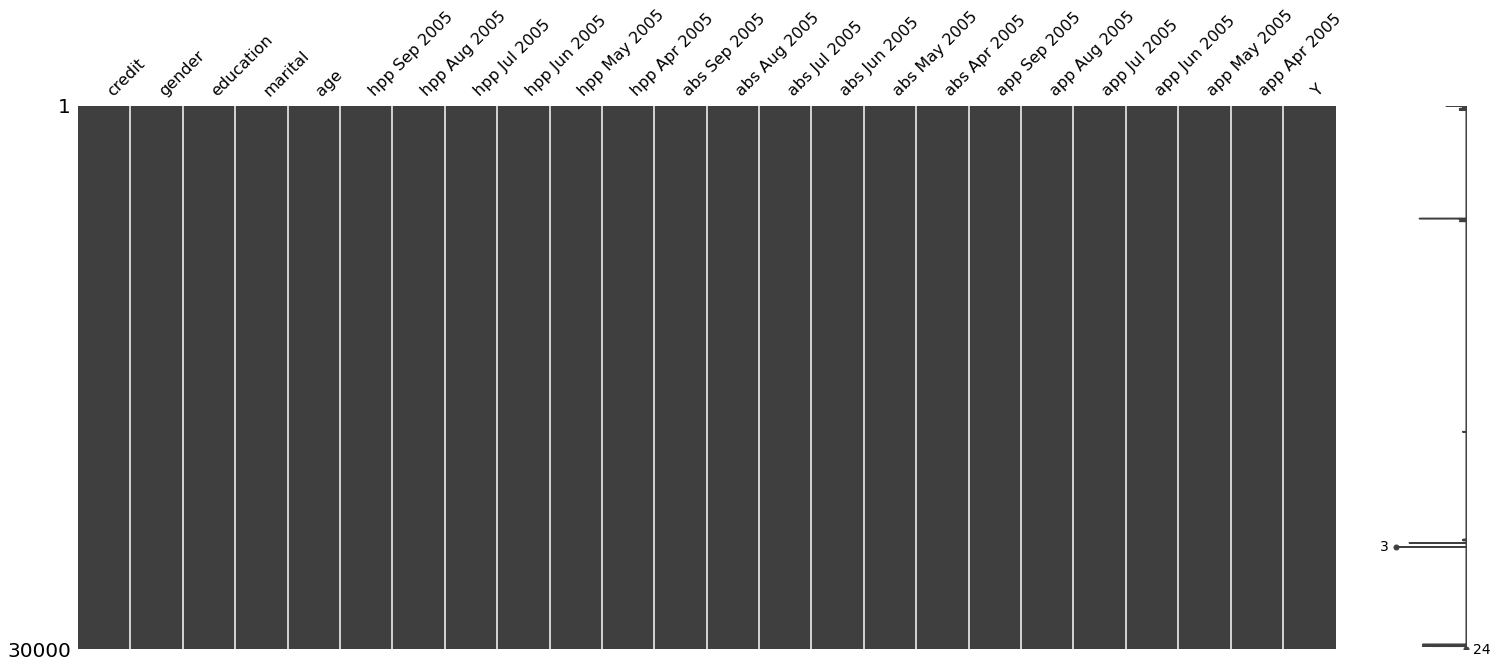

In [55]:
#Visualizar las valores faltantes con la libreria missingno
msno.matrix(data)
plt.show()

### 5. Describir la Información

In [56]:
data.describe()

,credit,gender,education,marital,age,hpp Sep 2005,hpp Aug 2005,hpp Jul 2005,hpp Jun 2005,hpp May 2005,hpp Apr 2005,abs Sep 2005,abs Aug 2005,abs Jul 2005,abs Jun 2005,abs May 2005,abs Apr 2005,app Sep 2005,app Aug 2005,app Jul 2005,app Jun 2005,app May 2005,app Apr 2005,Y
count,30000.000000,29999.000000,29998.000000,29998.000000,29995.000000,29997.000000,29995.000000,29993.000000,29991.000000,29984.000000,29986.000000,29989.000000,29989.000000,2.998700e+04,29985.000000,29983.000000,29990.000000,29992.000000,2.999100e+04,29992.000000,29989.000000,29989.000000,29995.000000,29997.000000
mean,167484.322667,1.603753,1.853057,1.551903,35.484214,-0.016635,-0.133689,-0.166405,-0.220800,-0.266342,-0.291136,51236.862750,49190.734669,4.702535e+04,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977,0.221189
std,129747.661567,0.489125,0.790320,0.521968,9.218024,1.123829,1.197254,1.196048,1.169153,1.133296,1.150134,73645.219278,71183.385123,6.936086e+04,64345.500073,60809.984983,59561.312967,16564.165089,2.304418e+04,17608.422625,15668.751975,15280.842069,17778.848359,0.415054
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3565.000000,2986.000000,2.667500e+03,2329.000000,1763.500000,1256.250000,1000.000000,8.355000e+02,390.000000,296.000000,251.000000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22387.000000,21207.000000,2.008900e+04,19052.000000,18107.000000,17081.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67139.000000,64027.000000,6.018200e+04,54560.000000,50213.000000,49208.250000,5006.000000,5.000000e+03,4505.500000,4014.000000,4033.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


## Limpieza de información

### 6. Usar el parámetro thresh en la función dropna 

In [57]:
# Usar el parametro thresh en la funcion dropna para identificar el numero de filas que no tienen undeterminado número de columnas vacias.
data.dropna(thresh=3, inplace = False) # En una fila, se necesitan al menos 21 valores nan para ser eliminada del df
data

,credit,gender,education,marital,age,hpp Sep 2005,hpp Aug 2005,hpp Jul 2005,hpp Jun 2005,hpp May 2005,hpp Apr 2005,abs Sep 2005,abs Aug 2005,abs Jul 2005,abs Jun 2005,abs May 2005,abs Apr 2005,app Sep 2005,app Aug 2005,app Jul 2005,app Jun 2005,app May 2005,app Apr 2005,Y
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,0.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


### 7. Determinar el porcentaje de filas de todo el dataframe que tienen al menos un valor vacío

In [58]:
# Determinar el porcentaje de filas de todo el dataframe que tienen al menos un valor vacío:

data.isna().any(axis=1).sum()/30000*100

0.13999999999999999

### 8. Eliminar todas las filas con valores vacíos

Eliminar todas las filas con valores vacios:

Debido a que las filas con valores vacíos representan menos del 1% de la muestra se decide eliminar todas las filas con valores vacíos. 

In [59]:
data.dropna(axis = 0, inplace = True) # axis 1 is columns / axis 0 is rows. 
data

,credit,gender,education,marital,age,hpp Sep 2005,hpp Aug 2005,hpp Jul 2005,hpp Jun 2005,hpp May 2005,hpp Apr 2005,abs Sep 2005,abs Aug 2005,abs Jul 2005,abs Jun 2005,abs May 2005,abs Apr 2005,app Sep 2005,app Aug 2005,app Jul 2005,app Jun 2005,app May 2005,app Apr 2005,Y
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,0.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


In [60]:
#Sumar los valores faltantes por columna
data.isna().sum()

credit          0
gender          0
education       0
marital         0
age             0
hpp Sep 2005    0
hpp Aug 2005    0
hpp Jul 2005    0
hpp Jun 2005    0
hpp May 2005    0
hpp Apr 2005    0
abs Sep 2005    0
abs Aug 2005    0
abs Jul 2005    0
abs Jun 2005    0
abs May 2005    0
abs Apr 2005    0
app Sep 2005    0
app Aug 2005    0
app Jul 2005    0
app Jun 2005    0
app May 2005    0
app Apr 2005    0
Y               0
dtype: int64

In [61]:
data.describe()

,credit,gender,education,marital,age,hpp Sep 2005,hpp Aug 2005,hpp Jul 2005,hpp Jun 2005,hpp May 2005,hpp Apr 2005,abs Sep 2005,abs Aug 2005,abs Jul 2005,abs Jun 2005,abs May 2005,abs Apr 2005,app Sep 2005,app Aug 2005,app Jul 2005,app Jun 2005,app May 2005,app Apr 2005,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,-0.266807,-0.291575,51248.119901,49200.493825,4.703239e+04,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,1.132307,1.149303,73674.949943,71211.232744,6.938524e+04,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3559.250000,2984.000000,2.664750e+03,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22379.000000,21194.500000,2.008550e+04,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67190.000000,64027.750000,6.018300e+04,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


### 9. Reemplazar valores de educación

Los en el dataframe aparecen valores 0, 5 y 6 en la data de educación que no se encuentran contemplados en el rango explicado en la descripcion de la data:

In [62]:
data.education.unique()

array([2., 1., 3., 5., 4., 6., 0.])

Se realizaron reemplazos en la data “X3: Educación” para cambiar los datos no registrados en el rango descrito para la data: (1 = posgrado; 2 = universidad; 3 = secundaria; 4 = otros), el valor 0 se reemplazó por 1 = posgrado y los valores 5 y 6 se reemplazaron por 4 = otros. 

In [63]:
data['education'].replace(0, 
           1, 
           inplace=True)
data['education'].replace(5, 
           4, 
           inplace=True)
data['education'].replace(6, 
           4, 
           inplace=True)

In [64]:
data.education.unique()

array([2., 1., 3., 4.])

###  10. Reemplazar valores fuera del rango para columnas  X6 - X11: Historial de pagos pasados (History of Past Payment hpp)

•	Se encuentra que en las casillas X6 - X11: Historial de pagos pasados (hpp) el mínimo valor de la escala es -2 pero en la descripción de la data el mínimo valor debería ser -1, por lo tanto, se decide reemplazar el valor -2 y 0 con -1. 

In [65]:
data['hpp Sep 2005'].unique()

array([ 2., -1.,  0., -2.,  1.,  3.,  4.,  8.,  7.,  5.,  6.])

In [66]:
data['hpp Sep 2005'].replace(-2, 
           -1, 
           inplace=True)
data['hpp Sep 2005'].replace(0, 
           -1, 
           inplace=True)
data['hpp Sep 2005'].unique()

array([ 2., -1.,  1.,  3.,  4.,  8.,  7.,  5.,  6.])

In [67]:
data['hpp Aug 2005'].unique()

array([ 2.,  0., -1., -2.,  3.,  5.,  7.,  4.,  1.,  6.,  8.])

In [68]:
data['hpp Aug 2005'].replace(-2, 
           -1, 
           inplace=True)
data['hpp Aug 2005'].replace(0, 
           -1, 
           inplace=True)
data['hpp Aug 2005'].unique()

array([ 2., -1.,  3.,  5.,  7.,  4.,  1.,  6.,  8.])

In [69]:
data['hpp Jul 2005'].unique()

array([-1.,  0.,  2., -2.,  3.,  4.,  6.,  7.,  1.,  5.,  8.])

In [70]:
data['hpp Jul 2005'].replace(-2, 
           -1, 
           inplace=True)
data['hpp Jul 2005'].replace(0, 
           -1, 
           inplace=True)
data['hpp Jul 2005'].unique()

array([-1.,  2.,  3.,  4.,  6.,  7.,  1.,  5.,  8.])

In [71]:
data['hpp Jun 2005'].unique()

array([-1.,  0., -2.,  2.,  3.,  4.,  5.,  7.,  6.,  1.,  8.])

In [72]:
data['hpp Jun 2005'].replace(-2, 
           -1, 
           inplace=True)
data['hpp Jun 2005'].replace(0, 
           -1, 
           inplace=True)
data['hpp Jun 2005'].unique()

array([-1.,  2.,  3.,  4.,  5.,  7.,  6.,  1.,  8.])

In [73]:
data['hpp May 2005'].unique()

array([-2.,  0., -1.,  2.,  3.,  5.,  4.,  7.,  8.,  6.])

In [74]:
data['hpp May 2005'].replace(-2, 
           -1, 
           inplace=True)
data['hpp May 2005'].replace(0, 
           -1, 
           inplace=True)
data['hpp May 2005'].unique()

array([-1.,  2.,  3.,  5.,  4.,  7.,  8.,  6.])

In [75]:
data['hpp Apr 2005'].unique()

array([-2.,  2.,  0., -1.,  3.,  6.,  4.,  7.,  8.,  5.])

In [76]:
data['hpp Apr 2005'].replace(-2, 
           -1, 
           inplace=True)
data['hpp Apr 2005'].replace(0, 
           -1, 
           inplace=True)
data['hpp Apr 2005'].unique()

array([-1.,  2.,  3.,  6.,  4.,  7.,  8.,  5.])

In [77]:
data.describe()

,credit,gender,education,marital,age,hpp Sep 2005,hpp Aug 2005,hpp Jul 2005,hpp Jun 2005,hpp May 2005,hpp Apr 2005,abs Sep 2005,abs Aug 2005,abs Jul 2005,abs Jun 2005,abs May 2005,abs Apr 2005,app Sep 2005,app Aug 2005,app Jul 2005,app Jun 2005,app May 2005,app Apr 2005,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,167555.900928,1.604012,1.840810,1.551739,35.483443,-0.416316,-0.532279,-0.555978,-0.624608,-0.680186,-0.671306,51248.119901,49200.493825,4.703239e+04,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,129737.299088,0.489070,0.743317,0.521952,9.214319,1.142539,1.146252,1.125108,1.066540,1.000431,1.004253,73674.949943,71211.232744,6.938524e+04,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,10000.000000,1.000000,1.000000,0.000000,21.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3559.250000,2984.000000,2.664750e+03,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,22379.000000,21194.500000,2.008550e+04,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,67190.000000,64027.750000,6.018300e+04,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


## Parte 3: Preparación de los datos

Con base en los resultados de tu libreta de Google Colab de la Parte 2 responde detalladamente las siguientes preguntas: 

### 1.	¿Qué datos considero más importantes? ¿Por qué?

Para entender cuales datos son más importantes hay que tener claridad sobre es el objetivo del estudio, en el caso de los datos presentados para el ejercicio el objetivo es predecir desde la perspectiva de gestión de riesgos la probabilidad de incumplimiento de pago de los clientes en Taiwán.
Con este objetivo en mente pienso que los datos más importantes presentados son:
* La variable de respuesta “Y”: pago por defecto (Sí = 1, No = 0).
En cuanto a las 23 variables explicativas para esta respuesta “Y”, pienso que es difícil determinar cuáles son las más importantes sin antes realizar un estudio estadístico inicial, pero intuitivamente considero que los datos más relevantes para predecir la probabilidad de incumplimiento de un pago son los siguientes: 
* X1: Monto del crédito otorgado (dólar NT): incluye tanto el crédito de consumo individual como su crédito familiar (complementario).
* X4: Estado civil (1 = casado; 2 = soltero; 3 = otros).
* X5: Edad (año).
* X6 - X11: Historial de pagos pasados. Seguimiento de los registros de pagos mensuales pasados (de abril a septiembre de 2005) 
o	La escala de medición del estado de amortización es: 
* -1 = pagar debidamente; 
* 1 = retraso en el pago de un mes; 
* 2 = retraso en el pago de dos meses
* 8 = retraso en el pago de ocho meses
* 9 = retraso en el pago de nueve meses o más.
* X12-X17: Importe del estado de cuenta (dólar NT). 

### 2.	 ¿Se eliminaron o reemplazaron datos nulos? ¿Qué se hizo y por qué?
Se decidió eliminar los valores nulos debido a que se encontró que 42 filas de las 30000 que componen el data set contienen al menos un valor vacío, estas 42 filas representan tan solo el 0.14% de la muestra por lo que se decide eliminarlas en lugar de reemplazarlas debido a que el reemplazo de estos valores puede generar problema como los siguientes: 
* No preservar la relación entre las variables.
* Subestimar el error estándar

### 3.	¿Es necesario ordenar los datos para el análisis? Sí / No / ¿Por qué?
No considero que sea necesario ordenar los datos para el análisis debido a que cada fila tiene un registro por cliente y esta es la relación de datos que se debe mantener durante el análisis independientemente del orden dado a dichos clientes. 


### 4.	¿Existen problemas de formato que deban solucionar antes del proceso de modelado? Sí / No / Por qué.

Se realizaron reemplazos en la data “X3: Educación” para cambiar los datos no registrados en el rango descrito en para la data: (1 = posgrado; 2 = universidad; 3 = secundaria; 4 = otros), el valor 0 se reemplazó por 1 = posgrado y los valores 5 y 6 se reemplazaron por 4 = otros. 

También en las columnas X6 - X11: Historial de pagos pasados, se encontraron valores de -2 que no hacen parte de la descripción del rango, 

### 5.	¿Qué ajustes se realizaron en el proceso de limpieza de datos (agregar, integrar, eliminar, modificar registros (filas), cambiar atributos (columnas)?
En el proceso de limpieza de datos se realizaron los siguientes pasos:
1.	Lectura del archivo en un dataframe.
2.	Cambiar el nombre de las columnas pro un nombre más fácil de leer, de la siguiente manera:
*	X1: credit 
*	X2: gender 
*	X3: education 
*	X4: marital 
*	X5: age
*	X6 - X11: Historial de pagos pasados (History of Past Payment hpp)
*	X6: hpp Sep 2005 
*	X7: hpp Aug 2005 
*	X8: hpp Jul 2005 
*	X9: hpp Jun 2005 
*	X10: hpp May 2005 
*	X11: hpp Apr 2005 
*	X12-X17: Importe del estado de cuenta (dólar NT) (Amount of bill statement (NT dollar) abs)
*	X12: abs Sep 2005 
*	X13: abs Aug 2005 
*	X14: abs Jul 2005 
*	X15: abs Jun 2005 
*	X16: abs May 2005 
*	X17: abs Apr 2005 
*	X18-X23: Monto del pago anterior (dólar NT). (Amount of previous payment (NT dollar) app)
*	X18: app Sep 2005 
*	X19: app Aug 2005 
*	X20: app Jul 2005 
*	X21: app Jun 2005 
*	X22: app May 2005 
*	X23: app Apr 2005
3.	Identificar la cantidad de valores faltantes en cada columna, la columna con más valores faltantes es “X15: abs Jun 2005” con 17 valores faltantes, la única columna sin valores faltantes es “X1: credit”. 
4.	Utilizar la librería missingno para visualizar los valores faltantes en el data set: los valores faltantes no representan visualmente ninguna diferencia en el data set. 
5.	Describir la información: utilizando la función describe: 
*	Se encuentra existen registros de nivel educativo de 1 a 6 niveles, pero en la descripción de la data solo se mencionan 4 niveles. Se realizaron reemplazos en la data “X3: Educación” para cambiar los datos no registrados en el rango descrito para la data: (1 = posgrado; 2 = universidad; 3 = secundaria; 4 = otros), el valor 0 se reemplazó por 1 = posgrado y los valores 5 y 6 se reemplazaron por 4 = otros.
*	Se encuentra que en las casillas X6 - X11: Historial de pagos pasados (hpp) el mínimo valor de la escala es -2 pero en la descripción de la data el mínimo valor debería ser -1, por lo tanto, se decide reemplazar el valor -2 y 0 con -1. 
6.	Usar el parámetro thresh en la función dropna para identificar el número de filas que tienen un determinado número de columnas vacías. Experimentando con esa función se construyó la siguiente tabla:

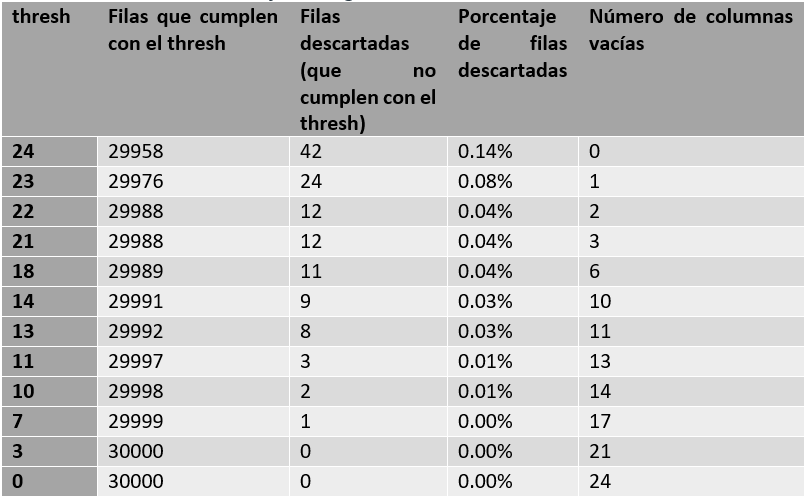



Con esta información se puede ver que 42 filas tienen al menos una columna vacía, y 3 filas tienen 21 columnas vacías.

7.	Determinar el porcentaje de filas de todo el dataframe que tienen al menos un valor vacío: 42 filas con valores vacíos corresponden al 0.1399% de la cantidad de filas del dataframe. 
8.	Debido a que las filas con valores vacíos representan menos del 1% de la muestra se decide eliminar todas las filas con valores vacíos. 
9.	Se realizaron reemplazos en la data “X3: Educación” para cambiar los datos no registrados en el rango descrito para la data: (1 = posgrado; 2 = universidad; 3 = secundaria; 4 = otros), el valor 0 se reemplazó por 1 = posgrado y los valores 5 y 6 se reemplazaron por 4 = otros.
10.	se decide reemplazar el valor -2 con -1, para las columnas X6 - X11: Historial de pagos pasados. 
